<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#画图" data-toc-modified-id="画图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>画图</a></span><ul class="toc-item"><li><span><a href="#输出矢量图" data-toc-modified-id="输出矢量图-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>输出矢量图</a></span></li><li><span><a href="#画连接图" data-toc-modified-id="画连接图-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>画连接图</a></span></li><li><span><a href="#画动态图" data-toc-modified-id="画动态图-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>画动态图</a></span></li></ul></li><li><span><a href="#显示和隐藏Cell" data-toc-modified-id="显示和隐藏Cell-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>显示和隐藏Cell</a></span></li><li><span><a href="#magic命令" data-toc-modified-id="magic命令-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>magic命令</a></span><ul class="toc-item"><li><span><a href="#列出magic命令" data-toc-modified-id="列出magic命令-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>列出magic命令</a></span></li><li><span><a href="#将本地的.py文件load到jupyter的一个cell中" data-toc-modified-id="将本地的.py文件load到jupyter的一个cell中-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>将本地的.py文件load到jupyter的一个cell中</a></span></li><li><span><a href="#运行python文件" data-toc-modified-id="运行python文件-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>运行python文件</a></span></li><li><span><a href="#列出所有的全局变量" data-toc-modified-id="列出所有的全局变量-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>列出所有的全局变量</a></span></li><li><span><a href="#保存到外部文件" data-toc-modified-id="保存到外部文件-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>保存到外部文件</a></span></li><li><span><a href="#函数耗时统计" data-toc-modified-id="函数耗时统计-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>函数耗时统计</a></span></li><li><span><a href="#python调试" data-toc-modified-id="python调试-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>python调试</a></span></li></ul></li><li><span><a href="#其他" data-toc-modified-id="其他-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>其他</a></span><ul class="toc-item"><li><span><a href="#多行输出" data-toc-modified-id="多行输出-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>多行输出</a></span></li><li><span><a href="#代码自动完成" data-toc-modified-id="代码自动完成-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>代码自动完成</a></span></li><li><span><a href="#公式编辑器LaTeX" data-toc-modified-id="公式编辑器LaTeX-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>公式编辑器LaTeX</a></span></li><li><span><a href="#帮助" data-toc-modified-id="帮助-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>帮助</a></span></li><li><span><a href="#跳转" data-toc-modified-id="跳转-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>跳转</a></span></li></ul></li><li><span><a href="#扩展" data-toc-modified-id="扩展-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>扩展</a></span></li><li><span><a href="#交互工具" data-toc-modified-id="交互工具-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>交互工具</a></span><ul class="toc-item"><li><span><a href="#滑块" data-toc-modified-id="滑块-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>滑块</a></span></li><li><span><a href="#选择框" data-toc-modified-id="选择框-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>选择框</a></span></li><li><span><a href="#文本框" data-toc-modified-id="文本框-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>文本框</a></span></li><li><span><a href="#播放框" data-toc-modified-id="播放框-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>播放框</a></span></li><li><span><a href="#日期选择" data-toc-modified-id="日期选择-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>日期选择</a></span></li><li><span><a href="#颜色选择" data-toc-modified-id="颜色选择-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>颜色选择</a></span></li><li><span><a href="#tab框" data-toc-modified-id="tab框-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>tab框</a></span></li><li><span><a href="#图像选择" data-toc-modified-id="图像选择-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>图像选择</a></span></li></ul></li><li><span><a href="#嵌入" data-toc-modified-id="嵌入-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>嵌入</a></span><ul class="toc-item"><li><span><a href="#嵌入网站" data-toc-modified-id="嵌入网站-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>嵌入网站</a></span></li><li><span><a href="#嵌入pdf" data-toc-modified-id="嵌入pdf-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>嵌入pdf</a></span></li><li><span><a href="#嵌入图像" data-toc-modified-id="嵌入图像-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>嵌入图像</a></span></li></ul></li><li><span><a href="#主题" data-toc-modified-id="主题-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>主题</a></span></li><li><span><a href="#导出" data-toc-modified-id="导出-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>导出</a></span></li><li><span><a href="#Reference:" data-toc-modified-id="Reference:-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Reference:</a></span></li></ul></div>

## 画图

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### 输出矢量图

In [2]:
%config InlineBackend.figure_format = 'svg'

### 画连接图

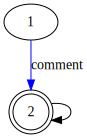

In [3]:
from graphviz import Digraph
u = Digraph()
u.edge("1", "2", label="comment", color="blue")
u.edge("2", "2")
u.node("2", shape="doublecircle")
u

### 画动态图

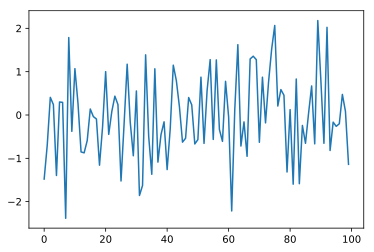

In [4]:
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.clf()
    pl.plot(pl.randn(100))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

In [ ]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")
for n in range(1,10):
   time.sleep(1)
   ax.plot(x, jn(x,n))
   clear_output(wait=True)
   display(f)    
plt.close()

## 显示和隐藏Cell

同样在其中一个cell（建议放在最开始的一个cell中）中输入一下代码，这个在你自己编辑notebook时不起作用，对导出结果中所有代码起作用：导出html或者pdf中是没有代码的。同样把它定义为函数集成在sciplot里面方便调用。

In [ ]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

In [ ]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)


隐藏/显示代码按钮

在随便一个cell中加入以下代码并运行就可以得到一个按钮，点击它就可以实现隐藏和显示代码。在notebook中对所有代码起作用；但是对导出结果中只对hide所在cell起作用

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)

隐藏cell

上面的隐藏代码功能，针对所有的cell里面的代码显示或者隐藏。在我们编写notebook的过程中，有时候希望隐藏指定的cell（有可能因为有些cell里面的代码太长，我们不想看到它）。可以用一下代码实现，放在每一个cell里面，运行就会出现按钮能显示或者隐藏这个cell里面的内容。


In [ ]:
import random
def hidecell(for_next):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    toggle_text = '显示/隐藏'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    # bit of JS to permanently hide code in current cell (only when toggling next cell)
    js_hide_current = ''
    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1, 2**64)))
    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current,
        toggle_text=toggle_text
    )
    return HTML(html)

In [ ]:
hidecell(False)

## magic命令

### 列出magic命令

In [ ]:
%lsmagic

### 将本地的.py文件load到jupyter的一个cell中

In [ ]:
%load test.py

### 运行python文件

In [ ]:
%run test.py

### 列出所有的全局变量

In [ ]:
%who

### 保存到外部文件

使用%%writefile magic可以保存cell的内容到外部文件。 而%pycat功能相反，把外部文件语法高亮显示（以弹出窗方式）

In [ ]:
%%writefile pythoncode.py 
import numpy 
def append_if_not_exists(arr, x): 
    if x not in arr: 
        arr.append(x) 

def some_useless_slow_function(): 
    arr = list() 
    for i in range(10000): 
        x = numpy.random.randint(0, 10000) 
        append_if_not_exists(arr, x)

In [ ]:
%pycat pythoncode.py

### 函数耗时统计

使用%prun+函数声明会给你一个按顺序排列的表格，显示每个内部函数的耗时情况，每次调用函数的耗时情况，以及累计耗时。


In [ ]:
%prun some_useless_slow_function()

### python调试

In [ ]:
%pdb

## 其他

### 多行输出
在Notebook的中开头cell中添加以下代码可以实现多行输出

In [ ]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

### 代码自动完成

在代码顶部添加%config IPCompleter.greedy=True这一行并且shift+回车运行，对于接下来运行过的内容都会被列入自动提示中。
按Tab键弹出自动提示
如下图，输入my然后Tab键就弹出上面自定义的两个变量名，然后按回车直接输入myCount，按向下箭头键再回车就输入myNum。


In [ ]:
%config IPCompleter.greedy=True

### 公式编辑器LaTeX

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

### 帮助

在库、方法或变量的前面打上?，即可打开相关语法的帮助文档。

In [ ]:
?str.replace()

### 跳转

在jupyter中设置link，需要设置两部分

[the_destination](#the_destination)

<a id='the_destination'></a>
dest

## 扩展

Hinterland功能可以让你每敲完一个键，就出现下拉菜单，可以直接选中你需要的词汇。

Snippets在工具栏里加了一个下拉菜单，可以非常方便的直接插入代码段，完全不用手动敲。

Table of contents这个功能可以自动找到所有的标题，生成目录。并且这个目录还是移动的呦，你可以放在侧边栏，也可以拖动到任何你喜欢的地方悬浮起来。

## 交互工具

还有一些Jupyter小工具，比如滑块、文本框之类的部分，可以做一些方便的交互。

https://github.com/jupyter-widgets/ipywidgets

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

### 滑块

In [2]:
def f(x):
    return x
# Generate a slider 
interact(f, x=10,);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

### 选择框

In [3]:
# Booleans generate check-boxes
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

### 文本框

In [4]:
# Strings generate text areas
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

### 播放框

In [5]:
play = widgets.Play(
  # interval=10,
  value=50,
 min=0,
 max=100,
 step=1,
 description="Press play",
 disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

### 日期选择

In [6]:
widgets.DatePicker(
 description='Pick a Date',
 disabled=False
)


DatePicker(value=None, description='Pick a Date')

### 颜色选择

In [7]:
widgets.ColorPicker(
 concise=False,
 description='Pick a color',
 value='blue',
 disabled=False
)

ColorPicker(value='blue', description='Pick a color')

### tab框

In [8]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, str(i))
tab

### 图像选择

In [11]:
import os
from IPython.display import Image

fdir="./"

@interact
def show_images(file=os.listdir('./')):
    display(Image(fdir+file))

interactive(children=(Dropdown(description='file', options=('线性规划.ipynb', 'jupyter技巧.ipynb', 'CrossRiver', 're…

## 嵌入

### 嵌入网站

In [ ]:
#Note that http urls will not be displayed. Only https are allowed inside the Iframe
from IPython.display import IFrame
IFrame('http://www.baidu.com', width=800, height=450)

### 嵌入pdf

In [ ]:
from IPython.display import IFrame
IFrame('https://arxiv.org/pdf/1406.2661.pdf', width=800, height=450)

### 嵌入图像

notebook 以 HTML 的方式进行展示，cell 的输出也可以是 HTML，所以事实上你可以返回任何东西：视频/音频/图像。

下面代码扫描了当前目录下的 png 文件，并输出它们的缩略图.


In [ ]:
import os
from IPython.display import display, Image
names = [f for f in os.listdir('./') if f.endswith('.png')]
for name in names[:5]:
    display(Image('./' + name, width=100))

## 主题

第一步：安装

pip install --upgrade jupyterthemes

第二步：查看可用的主题

jt -l

第三步：设置主题及格式

比如想修改主题和代码字体：

jt -t oceans16 -f fira

例如设置：

jt -t monokai -f fira -fs 10 -cellw 90% -ofs 10 -dfs 10 -T -nfs 10 -tfs 10

## 导出

导出pdf
https://www.jianshu.com/p/6b84a9631f8a

## Reference:

https://blog.csdn.net/tina_ttl/article/details/51031113#

https://www.jianshu.com/p/a85bc2a8fa56

https://www.zhihu.com/question/59392251

http://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html

http://liuchengxu.org/pelican-blog/jupyter-notebook-tips.html

https://zhuanlan.zhihu.com/p/36389916

https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Finteractive-visualizations-in-jupyter-notebook-3be02ab2b8cd

https://mortada.net/easily-profile-python-code-in-jupyter.html

https://github.com/QuantStack/xeus-cling

https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Fblog.jupyter.org%2Fa-diagram-editor-for-jupyterlab-a254121ff919

https://medium.com/@r_kierzkowski/10-tips-on-using-jupyter-notebook-abc0ba7028a4

https://xeus-cling.readthedocs.io/en/latest/